In [1]:
!pip install sklearn matplotlib shap seaborn 

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import shap
warnings.filterwarnings('ignore')


In [3]:
# Load datasets
fifa_df = pd.read_csv('C:/Users/Pimri/Downloads/archive (5)/Fifa 23 Players Data.csv')
football_df = pd.read_csv('C:/Users/Pimri/OneDrive/Documenten/Football stats dataset.csv')


In [4]:
fifa_df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [5]:
football_df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger;
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0;
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0;
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0;
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0;
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0;


In [6]:

# Preprocessing the FIFA dataset
# Assuming specific columns to drop - replace with actual columns if they are different
unnecessary_columns_fifa = ['Known As', 'Image Link']  # Update with actual column names
fifa_df.drop(columns=[col for col in unnecessary_columns_fifa if col in fifa_df.columns], errors='ignore', inplace=True)
fifa_df.fillna(fifa_df.mean(numeric_only=True), inplace=True)

# Preprocessing the Football Stats dataset
# Assuming 'player' is a duplicate column - update if the actual name is different
football_df.drop(columns=['player'], errors='ignore', inplace=True)
football_df.fillna(football_df.mean(numeric_only=True), inplace=True)

# Encoding categorical variables using one-hot encoding
fifa_df = pd.get_dummies(fifa_df, drop_first=True)
football_df = pd.get_dummies(football_df, drop_first=True)


In [7]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Columns: 20210 entries, Overall to Defensive Work Rate_Medium
dtypes: bool(20139), int64(71)
memory usage: 366.1 MB


In [8]:
fifa_df.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


In [9]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Columns: 10991 entries, height to winger;_1;
dtypes: bool(10974), float64(9), int64(8)
memory usage: 113.9 MB


In [10]:
football_df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000


# # EDA for Fifa Dataset

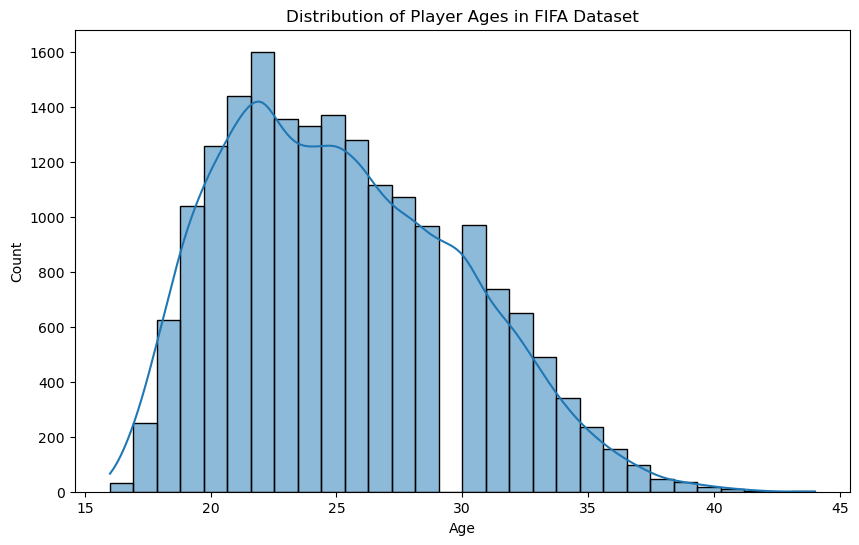

In [11]:
# Histogram of Player Ages
plt.figure(figsize=(10, 6))
sns.histplot(data=fifa_df, x='Age', bins=30, kde=True)
plt.title('Distribution of Player Ages in FIFA Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



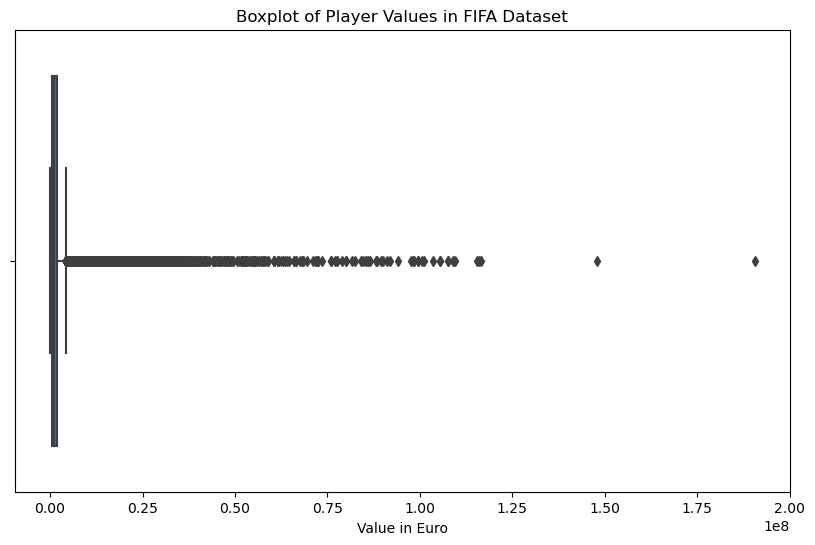

In [12]:
# Boxplot of Player Values
plt.figure(figsize=(10, 6))
sns.boxplot(data=fifa_df, x='Value(in Euro)')
plt.title('Boxplot of Player Values in FIFA Dataset')
plt.xlabel('Value in Euro')
plt.show()


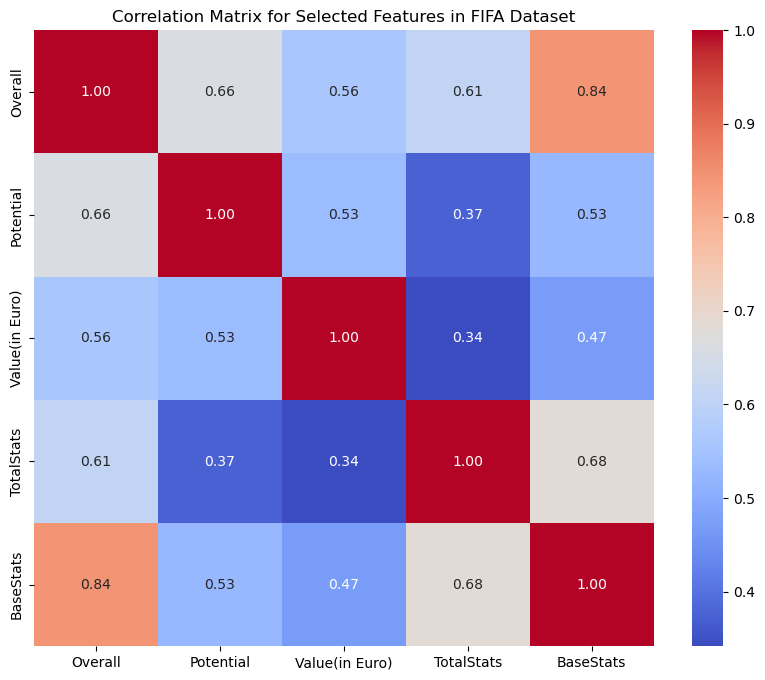

In [13]:
# Correlation heatmap for selected features
features = ['Overall', 'Potential', 'Value(in Euro)', 'TotalStats', 'BaseStats']
corr = fifa_df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features in FIFA Dataset')
plt.show()


# EDA for Football Dataset

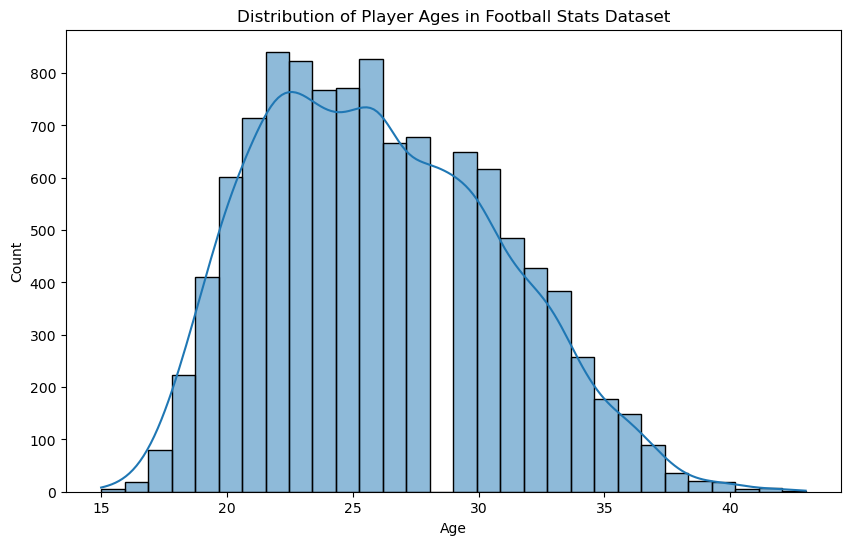

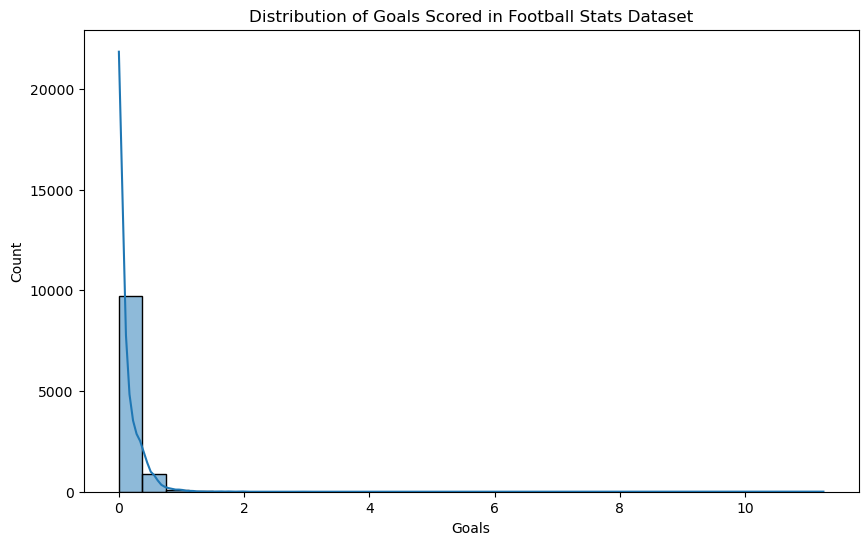

In [14]:
# Histogram of Player Ages
plt.figure(figsize=(10, 6))
sns.histplot(data=football_df, x='age', bins=30, kde=True)
plt.title('Distribution of Player Ages in Football Stats Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Histogram of Goals Scored
plt.figure(figsize=(10, 6))
sns.histplot(data=football_df, x='goals', bins=30, kde=True)
plt.title('Distribution of Goals Scored in Football Stats Dataset')
plt.xlabel('Goals')
plt.ylabel('Count')
plt.show()


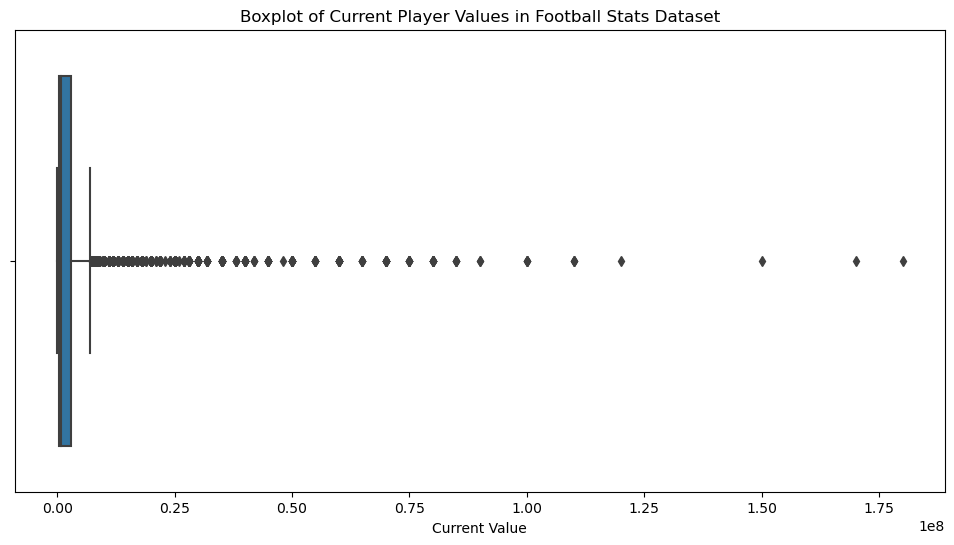

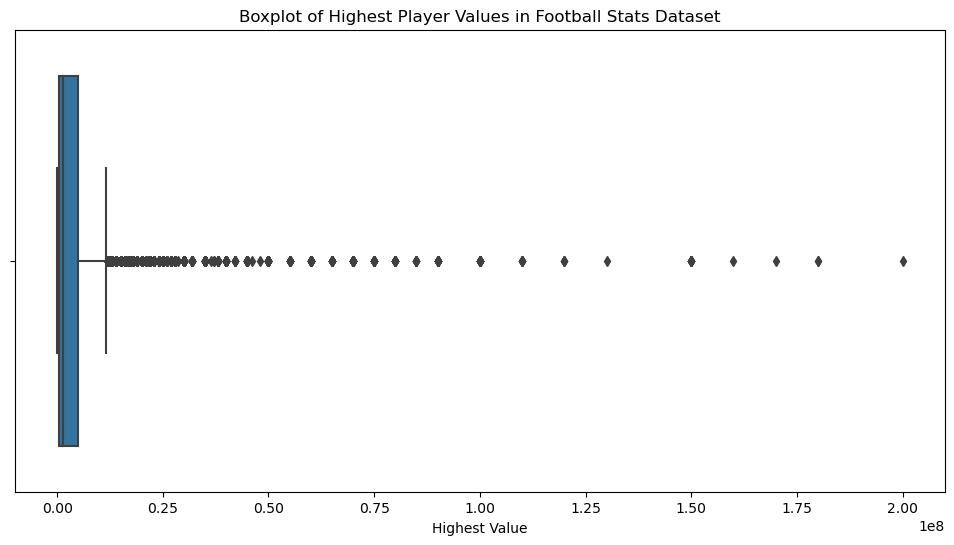

In [15]:
# Boxplot of Current and Highest Player Values
plt.figure(figsize=(12, 6))
sns.boxplot(data=football_df, x='current_value')
plt.title('Boxplot of Current Player Values in Football Stats Dataset')
plt.xlabel('Current Value')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=football_df, x='highest_value')
plt.title('Boxplot of Highest Player Values in Football Stats Dataset')
plt.xlabel('Highest Value')
plt.show()


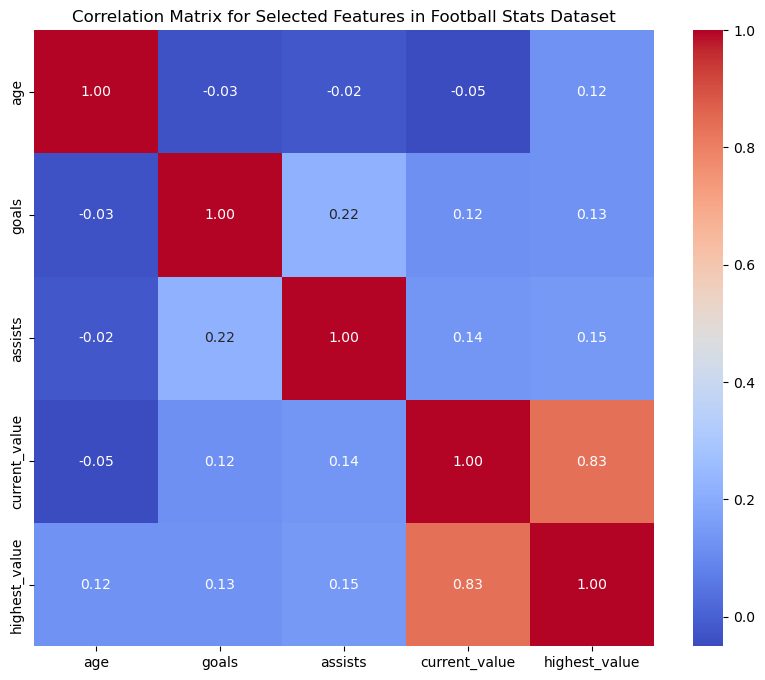

In [16]:
# Correlation heatmap for selected features
features_football = ['age', 'goals', 'assists', 'current_value', 'highest_value']
corr_football = football_df[features_football].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_football, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features in Football Stats Dataset')
plt.show()


# Feature Engineering

In [17]:
# Feature Engineering for FIFA Dataset
fifa_df['Performance_Score'] = fifa_df['Pace Total'] + fifa_df['Shooting Total'] + fifa_df['Passing Total'] + fifa_df['Dribbling Total'] + fifa_df['Defending Total'] + fifa_df['Physicality Total']


In [18]:
# Feature Engineering for Football Stats Dataset
football_df['Performance_Score'] = football_df['goals'] * 0.4 + football_df['assists'] * 0.3 + football_df['appearance'] * 0.3


In [19]:
from sklearn.model_selection import train_test_split

# Prepare FIFA Dataset
X_fifa = fifa_df.drop(['Value(in Euro)', 'Known As', 'Image Link', 'Full Name', 'Nationality', 'Club Name'], axis=1, errors='ignore')
y_fifa = fifa_df['Value(in Euro)']
X_train_fifa, X_test_fifa, y_train_fifa, y_test_fifa = train_test_split(X_fifa, y_fifa, test_size=0.3, random_state=42)

# Prepare Football Stats Dataset
X_football = football_df.drop(['current_value', 'player', 'team', 'name'], axis=1, errors='ignore')
y_football = football_df['current_value']
X_train_football, X_test_football, y_train_football, y_test_football = train_test_split(X_football, y_football, test_size=0.3, random_state=42)


# Training the Model

In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to train and evaluate models directly returning the RMSE using the 'squared=False' parameter
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Directly calculate RMSE
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

# Models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training and Evaluating on FIFA Dataset
rmse_rf_fifa, r2_rf_fifa = train_evaluate_model(rf, X_train_fifa, y_train_fifa, X_test_fifa, y_test_fifa)
rmse_gb_fifa, r2_gb_fifa = train_evaluate_model(gb, X_train_fifa, y_train_fifa, X_test_fifa, y_test_fifa)

# Training and Evaluating on Football Stats Dataset
rmse_rf_football, r2_rf_football = train_evaluate_model(rf, X_train_football, y_train_football, X_test_football, y_test_football)
rmse_gb_football, r2_gb_football = train_evaluate_model(gb, X_train_football, y_train_football, X_test_football, y_test_football)




In [21]:
# Print the results
print(f"FIFA Dataset - Random Forest: RMSE = {rmse_rf_fifa}, R2 = {r2_rf_fifa}")
print(f"FIFA Dataset - Gradient Boosting: RMSE = {rmse_gb_fifa}, R2 = {r2_gb_fifa}")
print(f"Football Stats Dataset - Random Forest: RMSE = {rmse_rf_football}, R2 = {r2_rf_football}")
print(f"Football Stats Dataset - Gradient Boosting: RMSE = {rmse_gb_football}, R2 = {r2_gb_football}")

FIFA Dataset - Random Forest: RMSE = 742060.5082799246, R2 = 0.9908560842379733
FIFA Dataset - Gradient Boosting: RMSE = 663401.9357735794, R2 = 0.9926918568369796
Football Stats Dataset - Random Forest: RMSE = 3123895.5457826443, R2 = 0.8943589858758448
Football Stats Dataset - Gradient Boosting: RMSE = 2959404.5225779386, R2 = 0.9051912937578014


# Hyper Parameter Tuning

In [22]:
# Hyperparameter Tuning for FIFA Dataset
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid_fifa = {
    'n_estimators': [10],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the Random Forest model
rf_fifa = RandomForestRegressor(random_state=42)

# Create the GridSearchCV model  
grid_search_fifa = GridSearchCV(estimator=rf_fifa, param_grid=param_grid_fifa, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_fifa.fit(X_train_fifa, y_train_fifa)

# Best estimator
best_rf_fifa = grid_search_fifa.best_estimator_

# Evaluate the best model
y_pred_fifa = best_rf_fifa.predict(X_test_fifa)
rmse_fifa = mean_squared_error(y_test_fifa, y_pred_fifa, squared=False)

print(f"Best Parameters for FIFA Dataset: {grid_search_fifa.best_params_}")
print(f"Best RMSE for FIFA Dataset: {rmse_fifa}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for FIFA Dataset: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Best RMSE for FIFA Dataset: 752562.7198561912


In [23]:
# Hyperparameter Tuning for Football Stats Dataset
# Setting up the parameter grid
param_grid_football = {
    'n_estimators': [10],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the Random Forest model
rf_football = RandomForestRegressor(random_state=42)

# Create the GridSearchCV model
grid_search_football = GridSearchCV(estimator=rf_football, param_grid=param_grid_football, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_football.fit(X_train_football, y_train_football)

# Best estimator
best_rf_football = grid_search_football.best_estimator_

# Evaluate the best model
y_pred_football = best_rf_football.predict(X_test_football)
rmse_football = mean_squared_error(y_test_football, y_pred_football, squared=False)

print(f"Best Parameters for Football Stats Dataset: {grid_search_football.best_params_}")
print(f"Best RMSE for Football Stats Dataset: {rmse_football}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for Football Stats Dataset: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best RMSE for Football Stats Dataset: 3104024.3087933166


# Model Evaluation

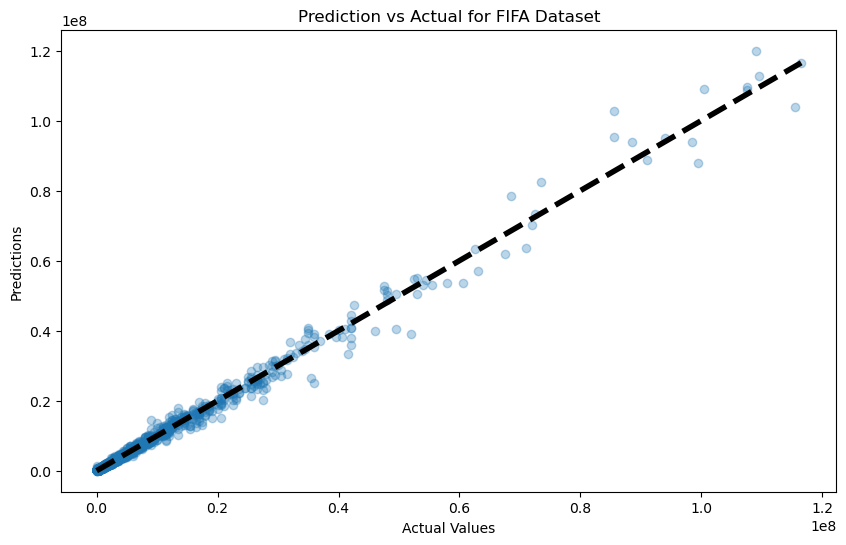

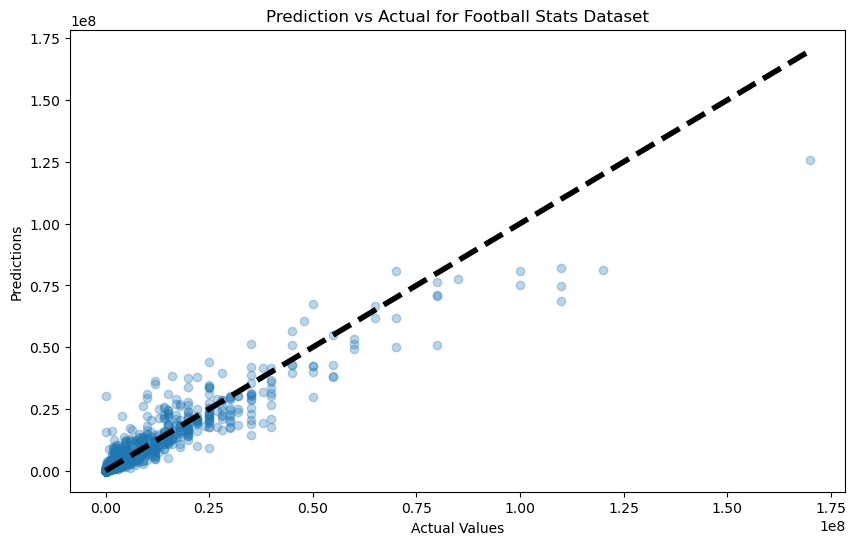

In [24]:

# Predictions for both datasets
y_pred_fifa = best_rf_fifa.predict(X_test_fifa)
y_pred_football = best_rf_football.predict(X_test_football)

# FIFA Dataset Prediction vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_fifa, y_pred_fifa, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Prediction vs Actual for FIFA Dataset')
plt.plot([y_test_fifa.min(), y_test_fifa.max()], [y_test_fifa.min(), y_test_fifa.max()], 'k--', lw=4)
plt.show()

# Football Stats Dataset Prediction vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_football, y_pred_football, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Prediction vs Actual for Football Stats Dataset')
plt.plot([y_test_football.min(), y_test_football.max()], [y_test_football.min(), y_test_football.max()], 'k--', lw=4)
plt.show()


<Figure size 1000x600 with 0 Axes>

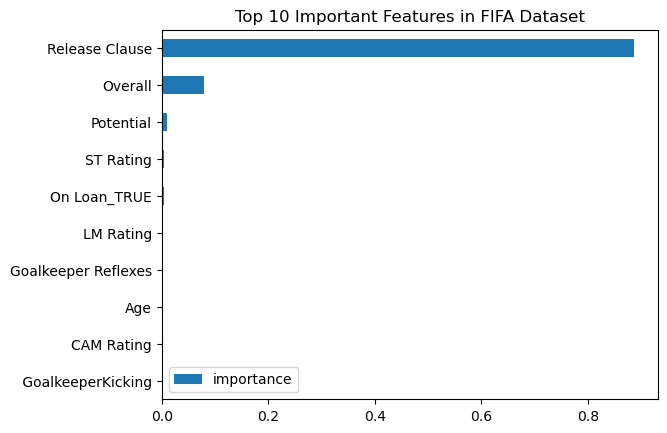

<Figure size 1000x600 with 0 Axes>

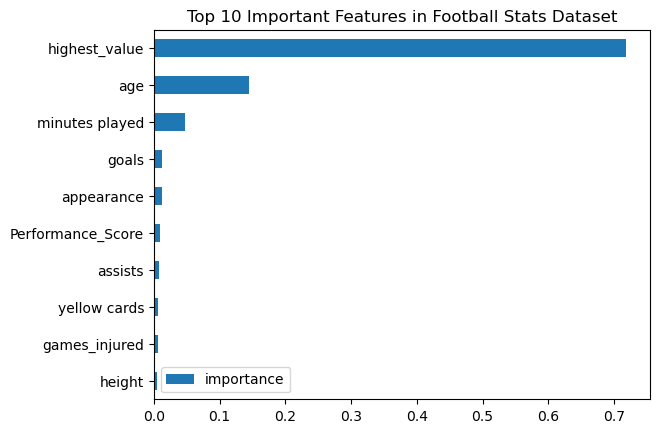

In [25]:

# Feature importance for FIFA Dataset
feature_importances_fifa = pd.DataFrame(best_rf_fifa.feature_importances_,
                                       index = X_train_fifa.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
feature_importances_fifa.head(10).plot(kind='barh')
plt.title('Top 10 Important Features in FIFA Dataset')
plt.gca().invert_yaxis()
plt.show()

# Feature importance for Football Stats Dataset
feature_importances_football = pd.DataFrame(best_rf_football.feature_importances_,
                                            index = X_train_football.columns,
                                            columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
feature_importances_football.head(10).plot(kind='barh')
plt.title('Top 10 Important Features in Football Stats Dataset')
plt.gca().invert_yaxis()
plt.show()


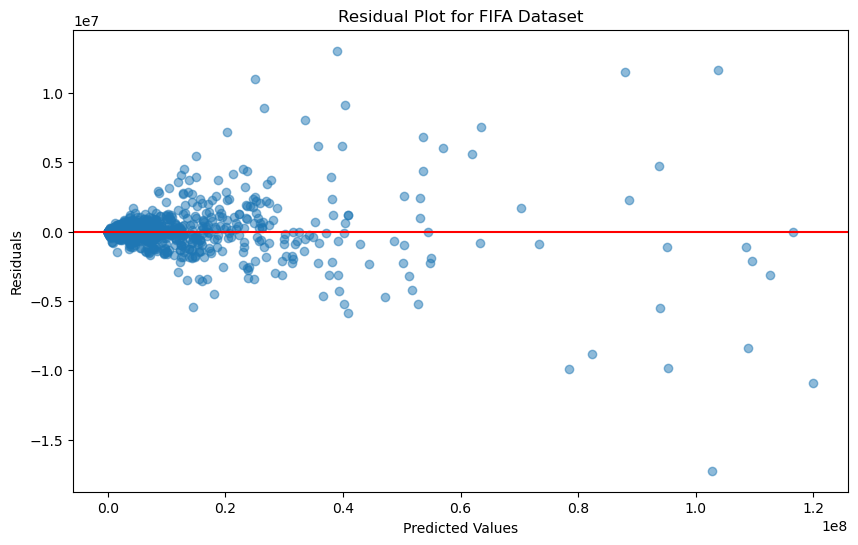

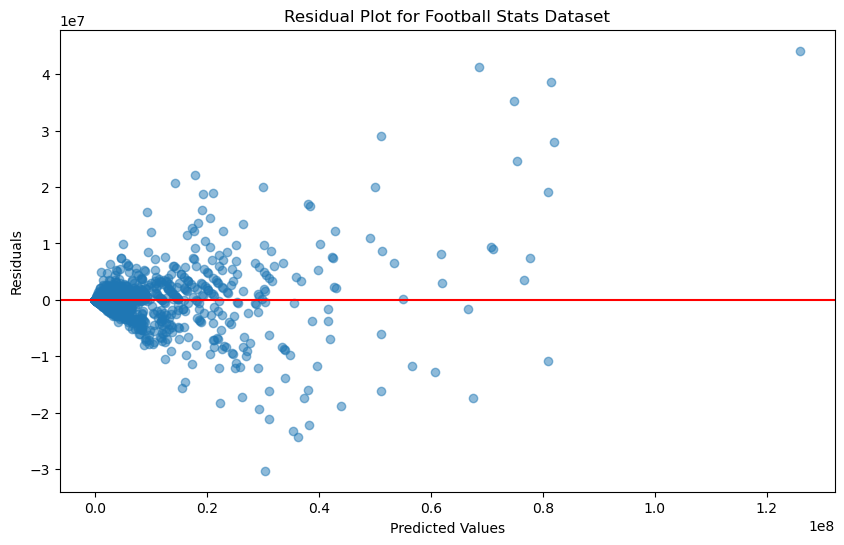

In [26]:

# FIFA Dataset Residual Plot
residuals_fifa = y_test_fifa - y_pred_fifa
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_fifa, residuals_fifa, alpha=0.5)
plt.title('Residual Plot for FIFA Dataset')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Football Stats Dataset Residual Plot
residuals_football = y_test_football - y_pred_football
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_football, residuals_football, alpha=0.5)
plt.title('Residual Plot for Football Stats Dataset')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


[]

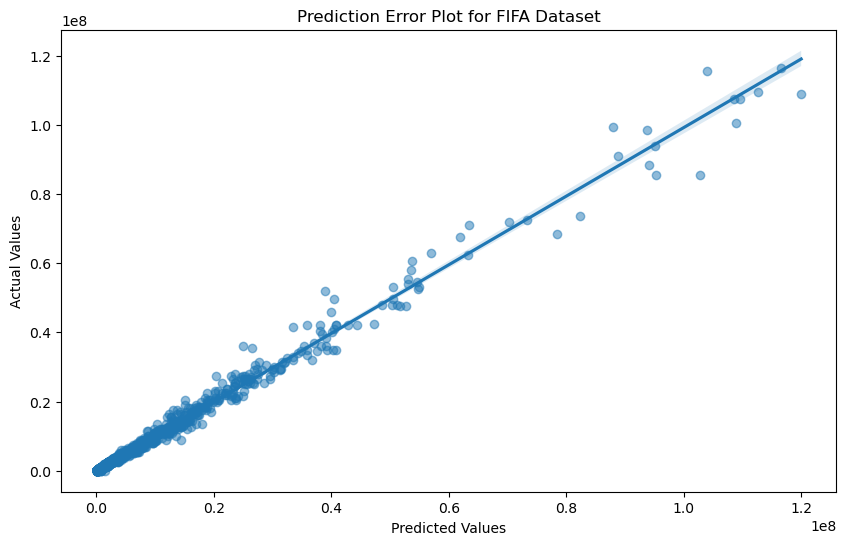

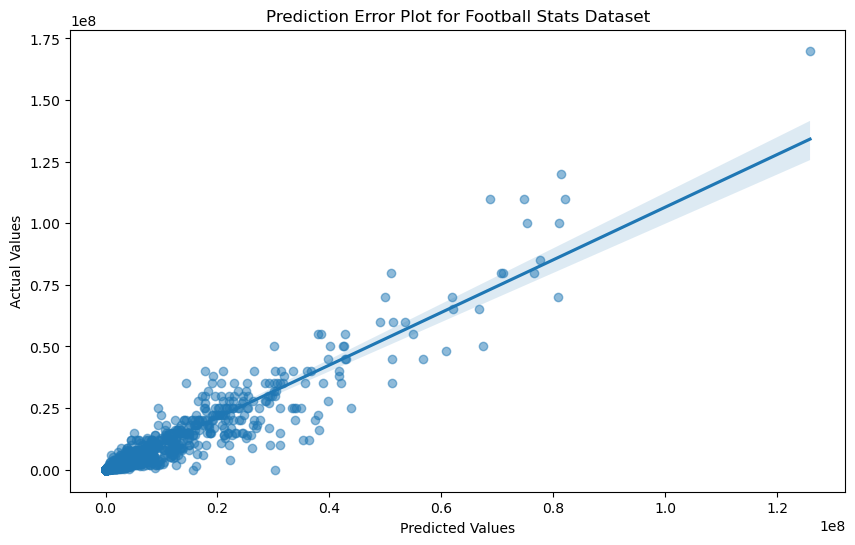

In [27]:

# Prediction Error Plot for FIFA Dataset
plt.figure(figsize=(10, 6))
sns.regplot(x=y_pred_fifa, y=y_test_fifa, fit_reg=True, scatter_kws={'alpha':0.5})
plt.title('Prediction Error Plot for FIFA Dataset')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.plot()

# Prediction Error Plot for Football Stats Dataset
plt.figure(figsize=(10, 6))
sns.regplot(x=y_pred_football, y=y_test_football, fit_reg=True, scatter_kws={'alpha':0.5})
plt.title('Prediction Error Plot for Football Stats Dataset')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.plot()


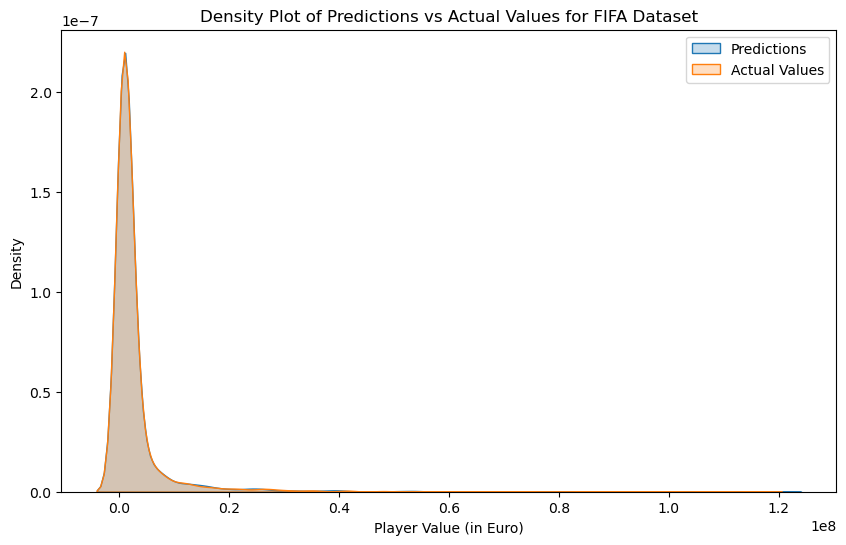

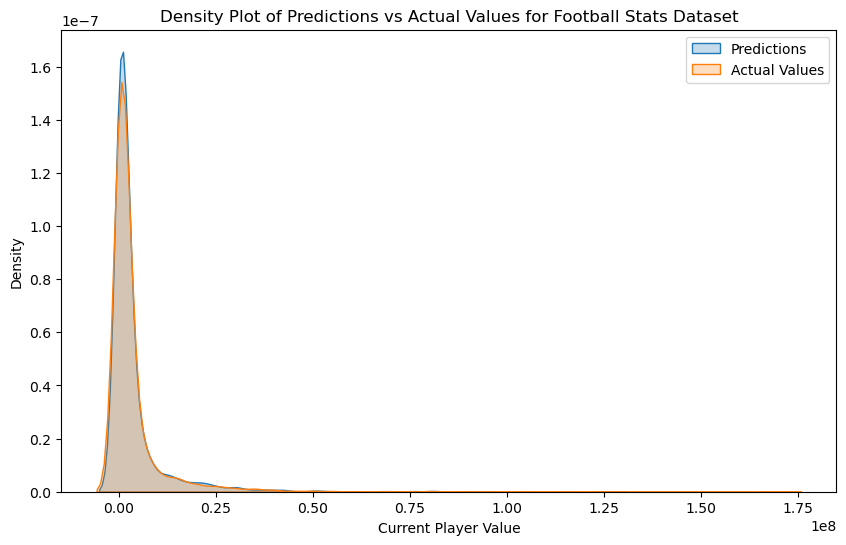

In [28]:
# Density Plot for FIFA Dataset
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred_fifa, label='Predictions', fill=True)
sns.kdeplot(y_test_fifa, label='Actual Values', fill=True)
plt.title('Density Plot of Predictions vs Actual Values for FIFA Dataset')
plt.xlabel('Player Value (in Euro)')
plt.legend()
plt.show()

# Density Plot for Football Stats Dataset
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred_football, label='Predictions', fill=True)
sns.kdeplot(y_test_football, label='Actual Values', fill=True)
plt.title('Density Plot of Predictions vs Actual Values for Football Stats Dataset')
plt.xlabel('Current Player Value')
plt.legend()
plt.show()


# SHAP 

Text(0.5, 1.0, 'SHAP Summary Plot - Football Stats Dataset')

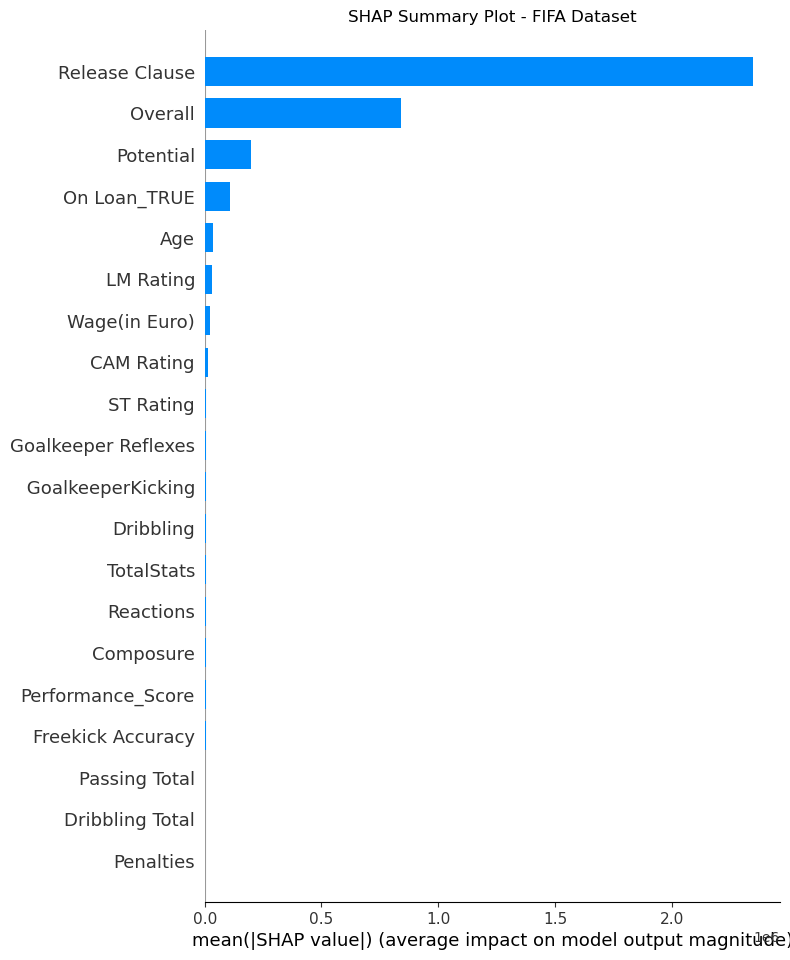

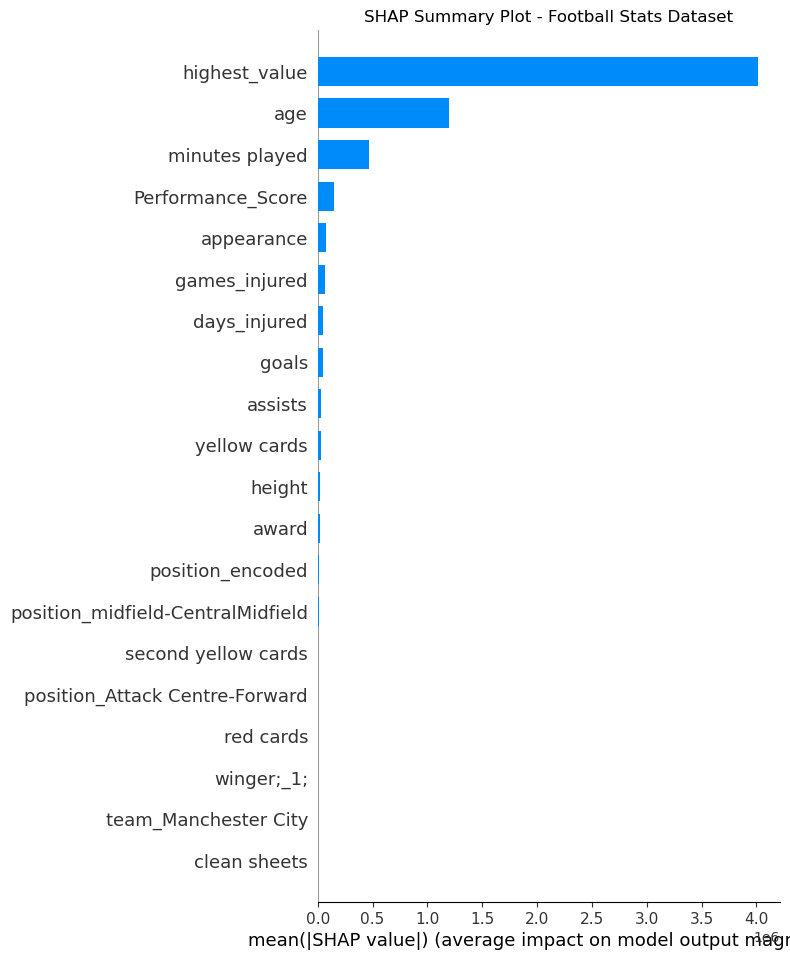

In [29]:


# Initialize the SHAP values explainer for FIFA Dataset
explainer_fifa = shap.TreeExplainer(best_rf_fifa)
shap_values_fifa = explainer_fifa.shap_values(X_test_fifa)

# Summary plot of SHAP values for FIFA Dataset
plt.figure()
shap.summary_plot(shap_values_fifa, X_test_fifa, plot_type="bar", show=False)
plt.title("SHAP Summary Plot - FIFA Dataset")

# Initialize the SHAP values explainer for Football Stats Dataset
explainer_football = shap.TreeExplainer(best_rf_football)
shap_values_football = explainer_football.shap_values(X_test_football)

# Summary plot of SHAP values for Football Stats Dataset
plt.figure()
shap.summary_plot(shap_values_football, X_test_football, plot_type="bar", show=False)
plt.title("SHAP Summary Plot - Football Stats Dataset")


In [30]:
# SHAP Impact Plot for FIFA Dataset
shap.initjs()
plt.figure()
shap.force_plot(explainer_fifa.expected_value, shap_values_fifa[0,:], X_test_fifa.iloc[0,:])
plt.show()

# SHAP Impact Plot for Football Stats Dataset
shap.initjs()
plt.figure()
shap.force_plot(explainer_football.expected_value, shap_values_football[0,:], X_test_football.iloc[0,:])
plt.show()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

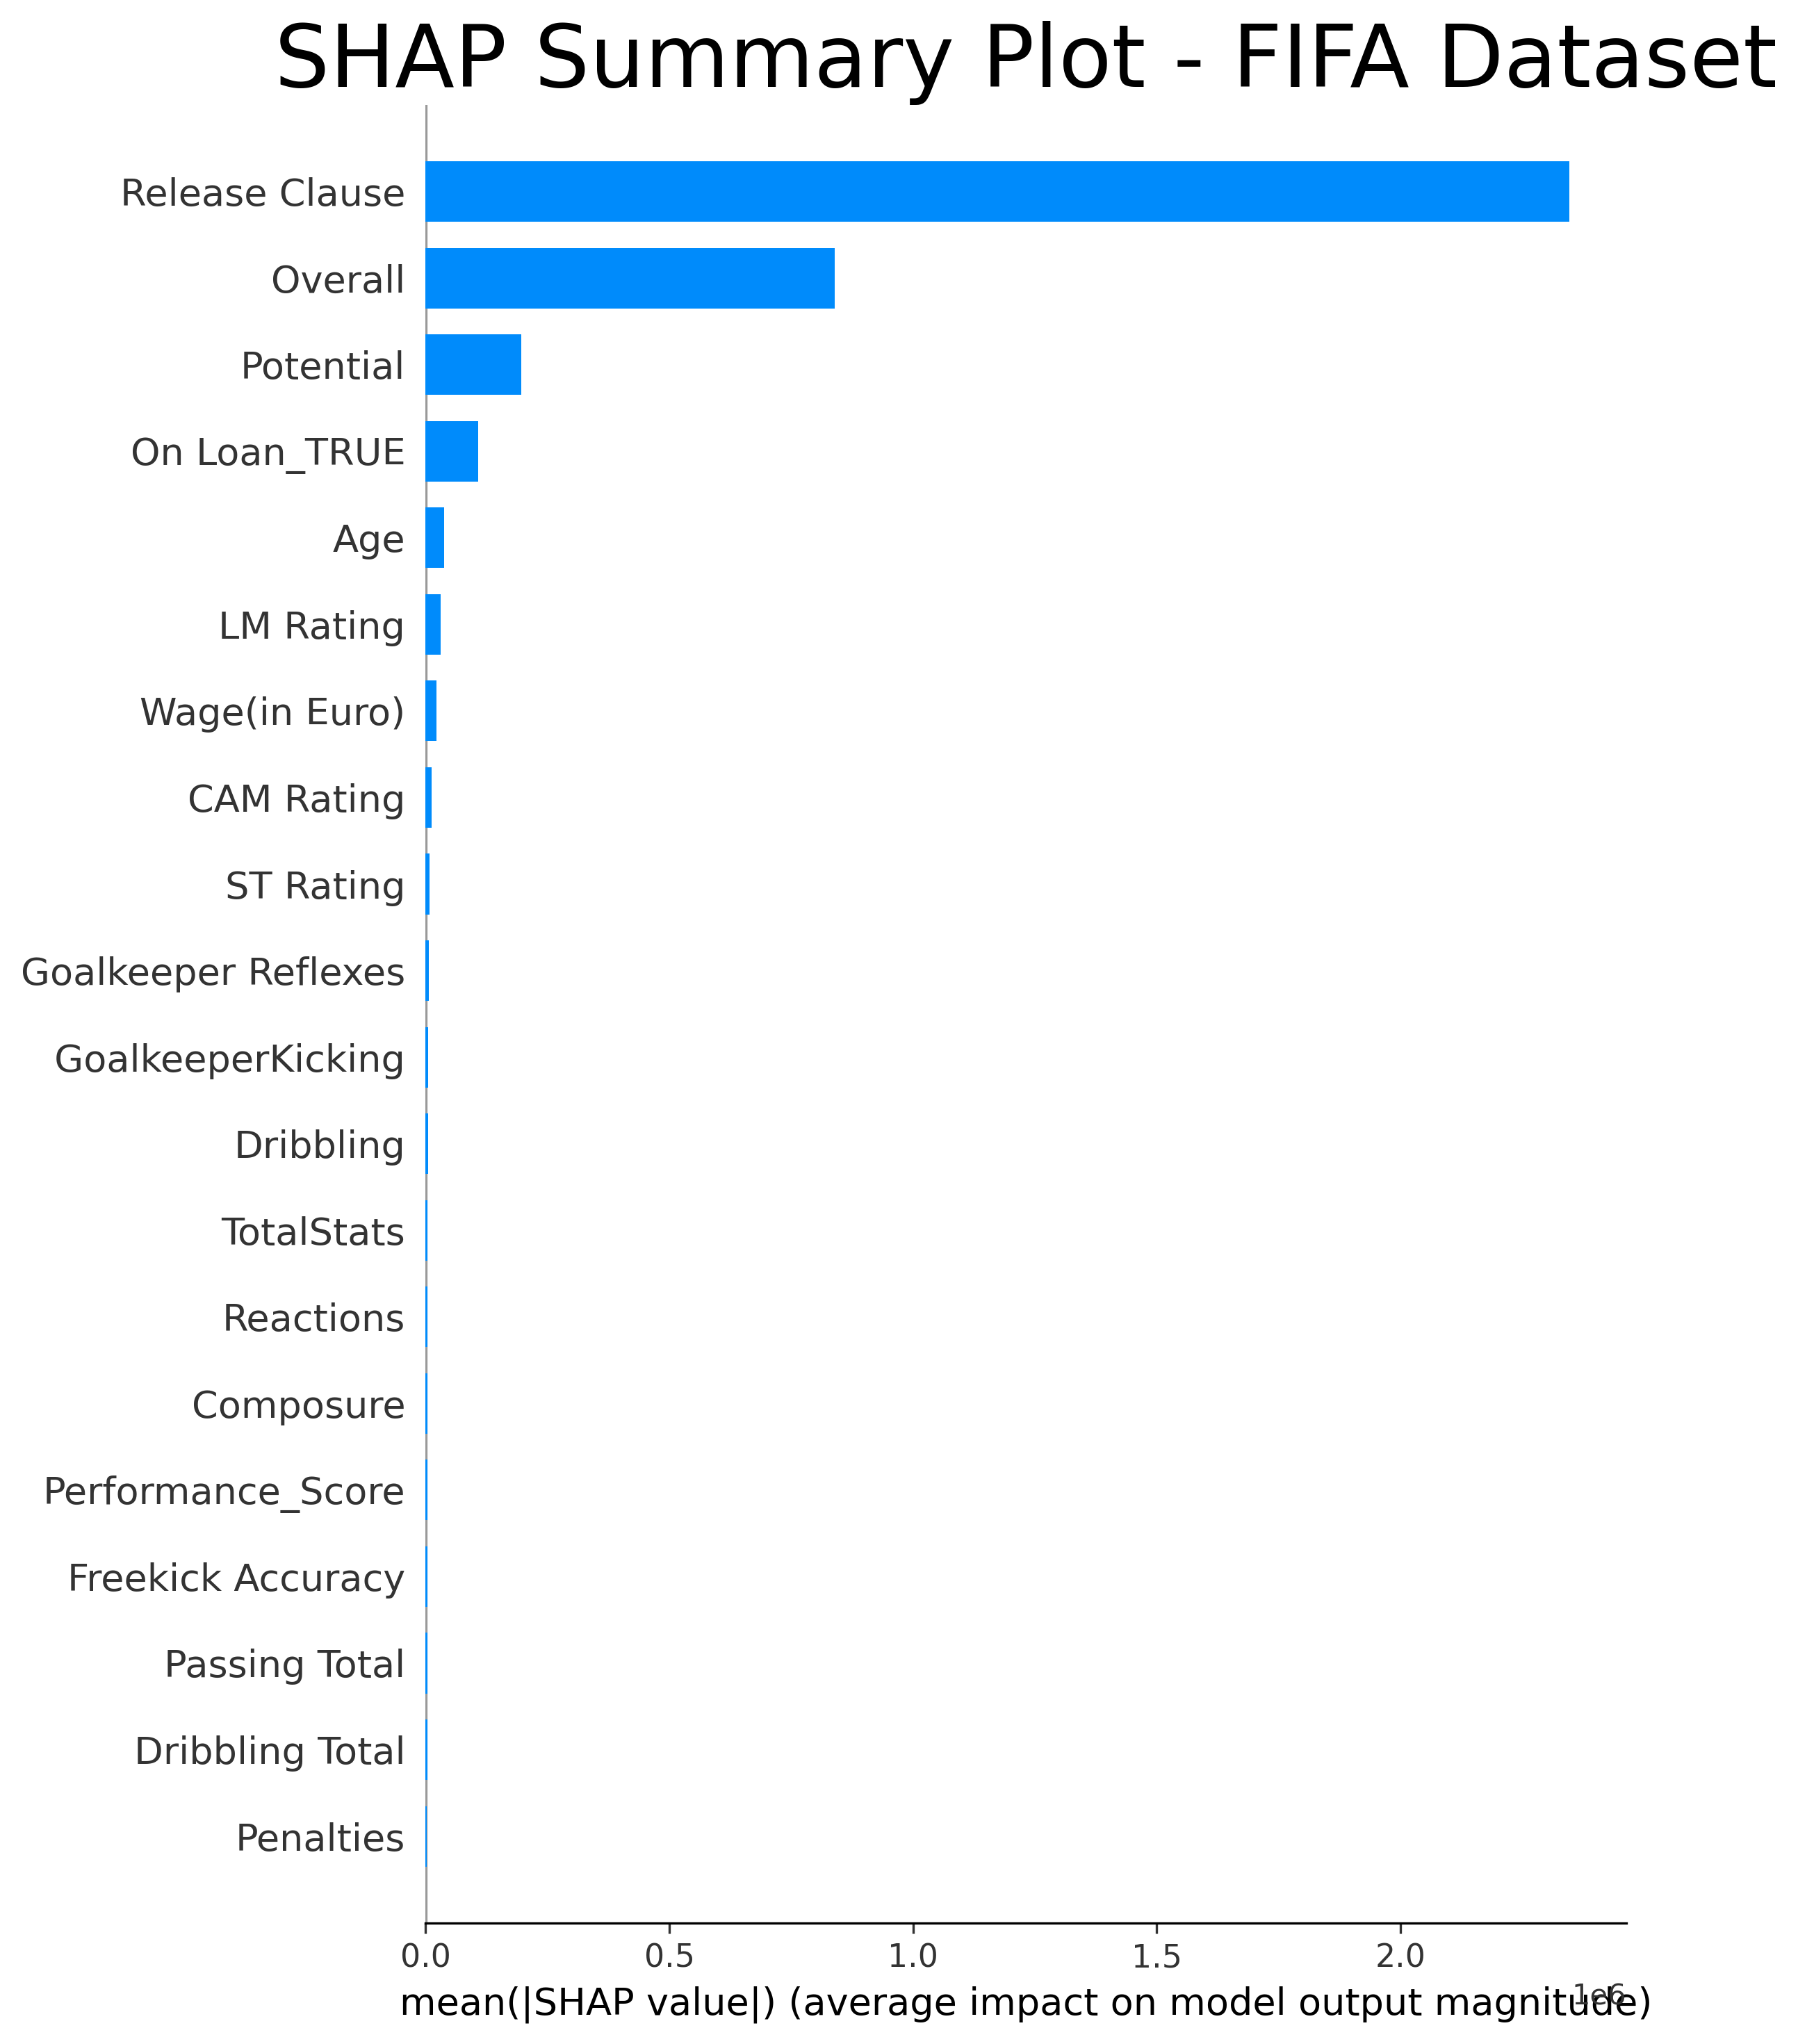

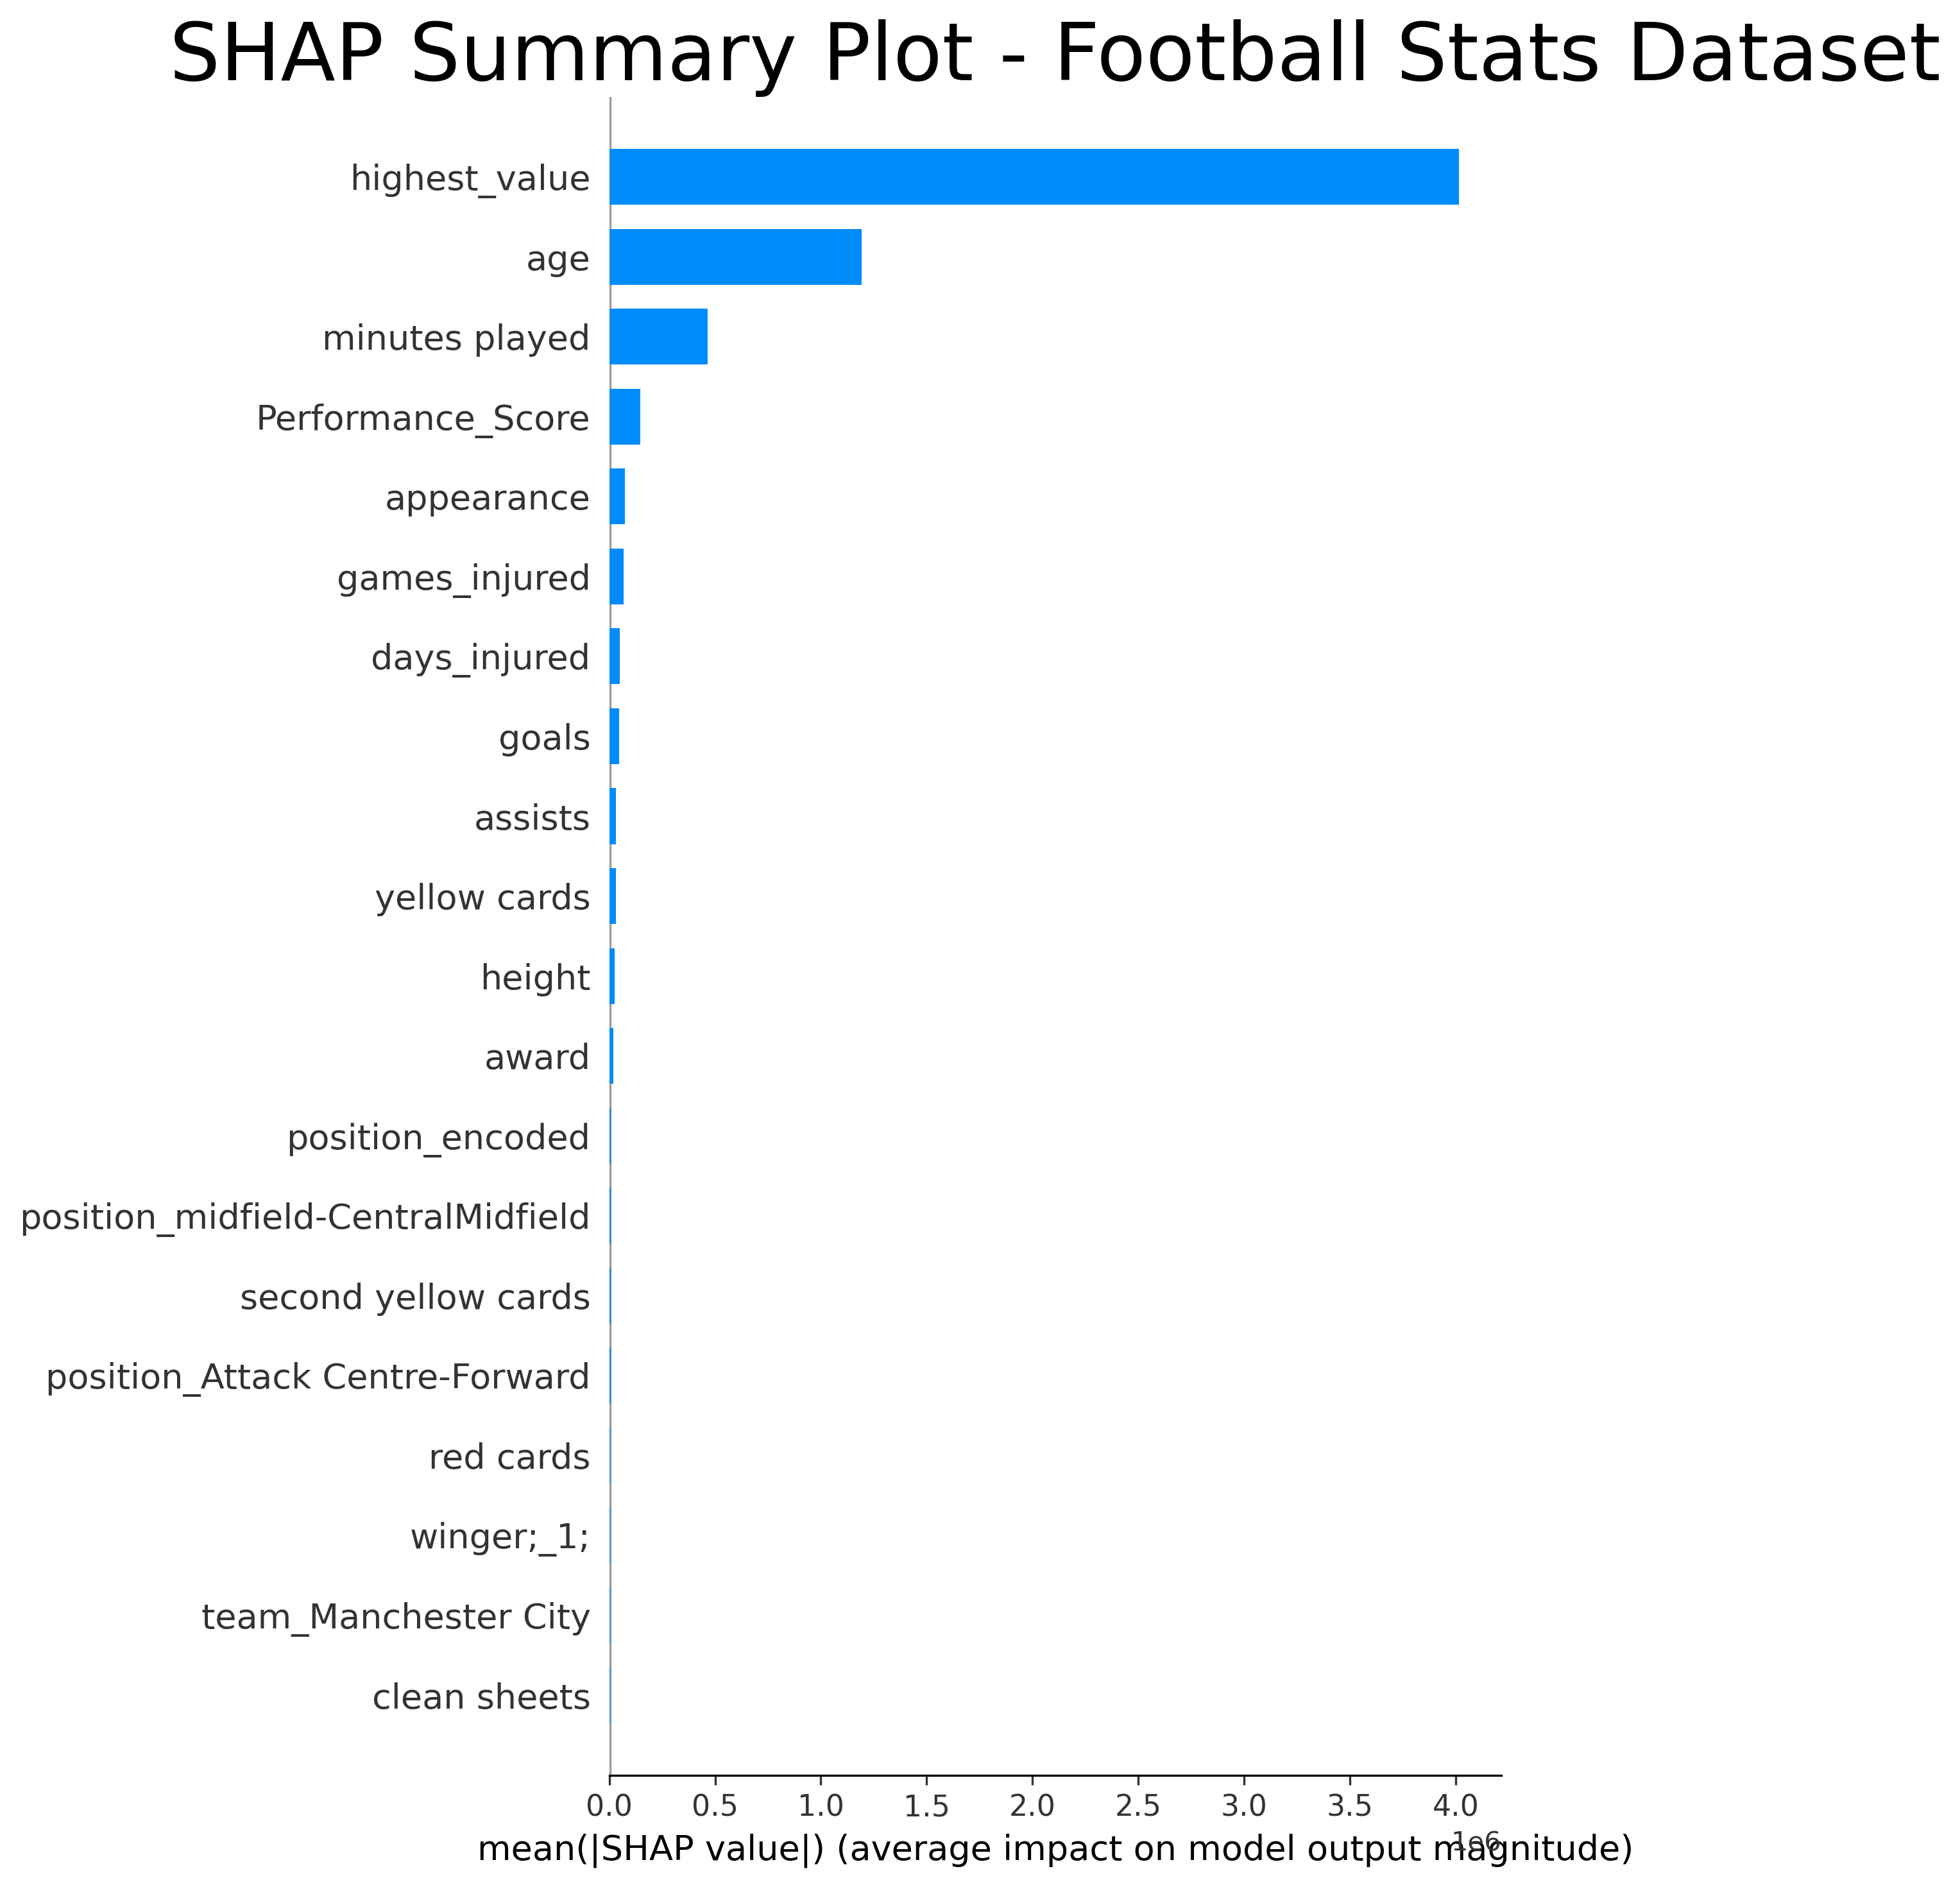

In [35]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP values explainer for FIFA Dataset
explainer_fifa = shap.TreeExplainer(best_rf_fifa)
shap_values_fifa = explainer_fifa.shap_values(X_test_fifa)

# Summary plot of SHAP values for FIFA Dataset with higher quality
plt.figure(figsize=(20, 15), dpi=300)
shap.summary_plot(shap_values_fifa, X_test_fifa, plot_type="bar", show=False)
plt.title("SHAP Summary Plot - FIFA Dataset", fontsize=30)
plt.savefig("shap_summary_fifa.png", bbox_inches='tight')
plt.show()

# Initialize the SHAP values explainer for Football Stats Dataset
explainer_football = shap.TreeExplainer(best_rf_football)
shap_values_football = explainer_football.shap_values(X_test_football)

# Summary plot of SHAP values for Football Stats Dataset with higher quality
plt.figure(figsize=(20, 15), dpi=300)
shap.summary_plot(shap_values_football, X_test_football, plot_type="bar", show=False)
plt.title("SHAP Summary Plot - Football Stats Dataset", fontsize=30)
plt.savefig("shap_summary_football.png", bbox_inches='tight')
plt.show()
